In [182]:
import matplotlib.pyplot as plt
import re
from typing import List, Tuple, Dict

In [183]:
CONFIGS = [
    "EntanglingIPrefetcherNoPrefetcherBaselineConfig",

    "EntanglingIPrefetcherTableSize002Sets2WaysConfig",
    "EntanglingIPrefetcherTableSize002Sets4WaysConfig",
    "EntanglingIPrefetcherTableSize002Sets8WaysConfig",
    "EntanglingIPrefetcherTableSize004Sets2WaysConfig",
    "EntanglingIPrefetcherTableSize004Sets4WaysConfig",
    "EntanglingIPrefetcherTableSize004Sets8WaysConfig",
    "EntanglingIPrefetcherTableSize008Sets2WaysConfig",
    "EntanglingIPrefetcherTableSize008Sets4WaysConfig",
    "EntanglingIPrefetcherTableSize008Sets8WaysConfig",
    "EntanglingIPrefetcherTableSize016Sets2WaysConfig",
    "EntanglingIPrefetcherTableSize016Sets4WaysConfig",
    "EntanglingIPrefetcherTableSize016Sets8WaysConfig",
    "EntanglingIPrefetcherTableSize032Sets2WaysConfig",
    "EntanglingIPrefetcherTableSize032Sets4WaysConfig",
    "EntanglingIPrefetcherTableSize032Sets8WaysConfig",
    "EntanglingIPrefetcherTableSize064Sets2WaysConfig",
    "EntanglingIPrefetcherTableSize064Sets4WaysConfig",
    "EntanglingIPrefetcherTableSize064Sets8WaysConfig",
    "EntanglingIPrefetcherTableSize128Sets2WaysConfig",
    "EntanglingIPrefetcherTableSize128Sets4WaysConfig",
    "EntanglingIPrefetcherTableSize128Sets8WaysConfig",
    "EntanglingIPrefetcherTableSize256Sets2WaysConfig",
    "EntanglingIPrefetcherTableSize256Sets4WaysConfig",
    "EntanglingIPrefetcherTableSize256Sets8WaysConfig",
    "EntanglingIPrefetcherTableSize512Sets2WaysConfig",
    "EntanglingIPrefetcherTableSize512Sets4WaysConfig",
    "EntanglingIPrefetcherTableSize512Sets8WaysConfig",

    "EntanglingIPrefetcherICacheSize064Sets2WaysNoPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize064Sets4WaysNoPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize128Sets2WaysNoPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize128Sets4WaysNoPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize256Sets2WaysNoPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize256Sets4WaysNoPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize512Sets2WaysNoPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize512Sets4WaysNoPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize064Sets2WaysWithPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize064Sets4WaysWithPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize128Sets2WaysWithPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize128Sets4WaysWithPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize256Sets2WaysWithPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize256Sets4WaysWithPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize512Sets2WaysWithPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize512Sets4WaysWithPrefetcherConfig",

    "EntanglingIPrefetcherMaxEntanglings1UncompressedConfig",
    "EntanglingIPrefetcherMaxEntanglings2UncompressedConfig",
    "EntanglingIPrefetcherMaxEntanglings3UncompressedConfig",
    "EntanglingIPrefetcherMaxEntanglings4UncompressedConfig",
    "EntanglingIPrefetcherMaxEntanglings5UncompressedConfig",
    "EntanglingIPrefetcherMaxEntanglings6UncompressedConfig",
    "EntanglingIPrefetcherMaxEntanglings1CompressedConfig",
    "EntanglingIPrefetcherMaxEntanglings2CompressedConfig",
    "EntanglingIPrefetcherMaxEntanglings3CompressedConfig",
    "EntanglingIPrefetcherMaxEntanglings4CompressedConfig",
    "EntanglingIPrefetcherMaxEntanglings5CompressedConfig",
    "EntanglingIPrefetcherMaxEntanglings6CompressedConfig",
]

In [184]:
CONFIG_PAIRS = [
    ("EntanglingIPrefetcherNoPrefetcherBaselineConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),

    ("EntanglingIPrefetcherTableSize002Sets2WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize002Sets4WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize002Sets8WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize004Sets2WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize004Sets4WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize004Sets8WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize008Sets2WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize008Sets4WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize008Sets8WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize016Sets2WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize016Sets4WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize016Sets8WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize032Sets2WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize032Sets4WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize032Sets8WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize064Sets2WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize064Sets4WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize064Sets8WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize128Sets2WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize128Sets4WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize128Sets8WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize256Sets2WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize256Sets4WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize256Sets8WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize512Sets2WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize512Sets4WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize512Sets8WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),

    ("EntanglingIPrefetcherICacheSize064Sets2WaysWithPrefetcherConfig", "EntanglingIPrefetcherICacheSize064Sets2WaysNoPrefetcherConfig"),
    ("EntanglingIPrefetcherICacheSize064Sets4WaysWithPrefetcherConfig", "EntanglingIPrefetcherICacheSize064Sets4WaysNoPrefetcherConfig"),
    ("EntanglingIPrefetcherICacheSize128Sets2WaysWithPrefetcherConfig", "EntanglingIPrefetcherICacheSize128Sets2WaysNoPrefetcherConfig"),
    ("EntanglingIPrefetcherICacheSize128Sets4WaysWithPrefetcherConfig", "EntanglingIPrefetcherICacheSize128Sets4WaysNoPrefetcherConfig"),
    ("EntanglingIPrefetcherICacheSize256Sets2WaysWithPrefetcherConfig", "EntanglingIPrefetcherICacheSize256Sets2WaysNoPrefetcherConfig"),
    ("EntanglingIPrefetcherICacheSize256Sets4WaysWithPrefetcherConfig", "EntanglingIPrefetcherICacheSize256Sets4WaysNoPrefetcherConfig"),
    ("EntanglingIPrefetcherICacheSize512Sets2WaysWithPrefetcherConfig", "EntanglingIPrefetcherICacheSize512Sets2WaysNoPrefetcherConfig"),
    ("EntanglingIPrefetcherICacheSize512Sets4WaysWithPrefetcherConfig", "EntanglingIPrefetcherICacheSize512Sets4WaysNoPrefetcherConfig"),

    ("EntanglingIPrefetcherMaxEntanglings1UncompressedConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings2UncompressedConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings3UncompressedConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings4UncompressedConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings5UncompressedConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings6UncompressedConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings1CompressedConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings2CompressedConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings3CompressedConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings4CompressedConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings5CompressedConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings6CompressedConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
]

In [185]:
OUTPUT_PATTERN = """
Cycles: (\d+)
Time: (\d+)
Instret: (\d+)
I\$ response: (\d+)
I\$ miss: (\d+)
Demand refill: (\d+)
Prefetch refill: (\d+)
Prefetch consumed: (\d+)
Late prefetch: (\d+)
Early prefetch: (\d+)
No prefetch: (\d+)
Erroneous prefetch: (\d+)
Demand miss cycles: (\d+)
Branch midpredict: (\d+)
"""

In [186]:
BENCHMARKS = [
    "radiosity",
    "barnes",
    "water_spatial",
    "ocean_cp",
]

In [187]:
RUNS = [
    #"Core",
    #"Core2",
    "Ext",
]

In [188]:
BENCHMARK_COLORS = {
    "radiosity": "red",
    "barnes": "brown",
    "water_spatial": "blue",
    "ocean_cp": "orange",
}

In [189]:
BENCHMARK_MARKERS = {
    "radiosity": "o",
    "barnes": "s",
    "water_spatial": "d",
    "ocean_cp": "x",
}

In [190]:
BENCHMARK_NAMES = {
    "radiosity": "Radiosity",
    "barnes": "Barnes",
    "water_spatial": "Water",
    "ocean_cp": "Ocean",
}

In [191]:
def import_file(path: str) -> Dict[str, int]:
    output = ""
    with open(path, "r") as fp:
        output = fp.read()
    matches = re.search(OUTPUT_PATTERN, output, re.MULTILINE)      
    assert(matches is not None)
    return {
        "cycles":             int(matches.group(1)),
        "time":               int(matches.group(2)),
        "instret":            int(matches.group(3)),
        "response":           int(matches.group(4)),
        "miss":               int(matches.group(5)),
        "demand_refill":      int(matches.group(6)),
        "prefetch_refill":    int(matches.group(7)),
        "prefetch_consumed":  int(matches.group(8)),
        "late_prefetch":      int(matches.group(9)),
        "early_prefetch":     int(matches.group(10)),
        "no_prefetch":        int(matches.group(11)),
        "erroneous_prefetch": int(matches.group(12)),
        "demand_miss_cycles": int(matches.group(13)),
        "branch_midpredict":  int(matches.group(14)),
    }

In [192]:
def add_simple_metrics(metrics: Dict[str, int]) -> Dict[str, int]:
    metrics["frac_demand_miss_cycles"] = metrics["demand_miss_cycles"] / metrics["cycles"]
    metrics["frac_miss"] = metrics["miss"] / metrics["response"]
    metrics["frac_late_prefetch"] = metrics["late_prefetch"] / metrics["prefetch_refill"] if metrics["prefetch_refill"] > 0 else 0
    metrics["frac_early_prefetch"] = metrics["early_prefetch"] / metrics["prefetch_refill"]  if metrics["prefetch_refill"] > 0 else 0
    metrics["frac_erroneous_prefetch"] = metrics["erroneous_prefetch"] / metrics["prefetch_refill"]  if metrics["prefetch_refill"] > 0 else 0
    metrics["frac_no_prefetch"] = metrics["no_prefetch"] / metrics["miss"]
    metrics["cpi"] = metrics["cycles"] / metrics["instret"]
    return metrics

In [193]:
def add_relative_metrics(data: Dict[str, Dict[str, Dict[str, int]]]):
    for prefetcher_config, baseline_config in CONFIG_PAIRS:
        for benchmark in BENCHMARKS:
            data[prefetcher_config][benchmark]["speedup"] = data[baseline_config][benchmark]["time"] / data[prefetcher_config][benchmark]["time"]
            data[prefetcher_config][benchmark]["frac_miss_change"] = data[prefetcher_config][benchmark]["frac_miss"] / data[baseline_config][benchmark]["frac_miss"] 
            data[prefetcher_config][benchmark]["frac_demand_miss_cycles_change"] = data[prefetcher_config][benchmark]["demand_miss_cycles"] / data[baseline_config][benchmark]["demand_miss_cycles"] 
    return data

In [194]:
RESULTS = {
    run: add_relative_metrics({
        config: {
            benchmark: add_simple_metrics(
                import_file(f"/local/scratch/ldh35/rocket-chip/evaluation/results/{run}/{config}/{benchmark}.output")
            ) for benchmark in BENCHMARKS
        }
        for config in CONFIGS
    }) for run in RUNS
}

In [195]:
def plot_trend(
    what: str,
    run: str,
    configs: List[Tuple[int, str, str]],
    fig_width=10,
    fig_height=5,
    ymin=None,
    figax = None,
):
    fig, ax = figax if figax is not None else plt.subplots()

    fig.set_size_inches(fig_width, fig_height)
    ax.set_xticks([x[0] for x in configs], [x[1] for x in configs])

    baseline=None
    if configs[0][2] == "EntanglingIPrefetcherNoPrefetcherBaselineConfig":
        configs = configs.copy()
        baseline = configs.pop(0)

    for benchmark in BENCHMARKS:
        xvalues, yvalues = zip(*[(x, RESULTS[run][config][benchmark][what]) for (x, _, config) in configs])
        ax.plot(
            xvalues, 
            yvalues, 
            color=BENCHMARK_COLORS[benchmark],
            marker=BENCHMARK_MARKERS[benchmark],
            label=BENCHMARK_NAMES[benchmark],
        )
        if baseline:
            ax.plot(
                [baseline[0], configs[0][0]], 
                [RESULTS[run][baseline[2]][benchmark][what], RESULTS[run][configs[0][2]][benchmark][what]], 
                color=BENCHMARK_COLORS[benchmark],
                marker=BENCHMARK_MARKERS[benchmark],
                linestyle="--",
            )

    if ymin is not None:
        ax.set_ylim(bottom=ymin)

    fig.legend()

    return fig, ax

In [196]:
TREND_NO_PREFETCHER_BASELINE = [
    (0,   "0", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
]

TREND_TABLE_SIZE_2_WAYS = [
    (1,   "2", "EntanglingIPrefetcherTableSize002Sets2WaysConfig"),
    (2,   "4", "EntanglingIPrefetcherTableSize004Sets2WaysConfig"),
    (3,   "8", "EntanglingIPrefetcherTableSize008Sets2WaysConfig"),
    (4,  "16", "EntanglingIPrefetcherTableSize016Sets2WaysConfig"),
    (5,  "32", "EntanglingIPrefetcherTableSize032Sets2WaysConfig"),
    (6,  "64", "EntanglingIPrefetcherTableSize064Sets2WaysConfig"),
    (7, "128", "EntanglingIPrefetcherTableSize128Sets2WaysConfig"),
    (8, "256", "EntanglingIPrefetcherTableSize256Sets2WaysConfig"),
    (9, "512", "EntanglingIPrefetcherTableSize512Sets2WaysConfig"),
]

TREND_TABLE_SIZE_4_WAYS = [
    (1,   "2", "EntanglingIPrefetcherTableSize002Sets4WaysConfig"),
    (2,   "4", "EntanglingIPrefetcherTableSize004Sets4WaysConfig"),
    (3,   "8", "EntanglingIPrefetcherTableSize008Sets4WaysConfig"),
    (4,  "16", "EntanglingIPrefetcherTableSize016Sets4WaysConfig"),
    (5,  "32", "EntanglingIPrefetcherTableSize032Sets4WaysConfig"),
    (6,  "64", "EntanglingIPrefetcherTableSize064Sets4WaysConfig"),
    (7, "128", "EntanglingIPrefetcherTableSize128Sets4WaysConfig"),
    (8, "256", "EntanglingIPrefetcherTableSize256Sets4WaysConfig"),
    (9, "512", "EntanglingIPrefetcherTableSize512Sets4WaysConfig"),
]

TREND_TABLE_SIZE_8_WAYS = [
    (1,   "2", "EntanglingIPrefetcherTableSize002Sets8WaysConfig"),
    (2,   "4", "EntanglingIPrefetcherTableSize004Sets8WaysConfig"),
    (3,   "8", "EntanglingIPrefetcherTableSize008Sets8WaysConfig"),
    (4,  "16", "EntanglingIPrefetcherTableSize016Sets8WaysConfig"),
    (5,  "32", "EntanglingIPrefetcherTableSize032Sets8WaysConfig"),
    (6,  "64", "EntanglingIPrefetcherTableSize064Sets8WaysConfig"),
    (7, "128", "EntanglingIPrefetcherTableSize128Sets8WaysConfig"),
    (8, "256", "EntanglingIPrefetcherTableSize256Sets8WaysConfig"),
    (9, "512", "EntanglingIPrefetcherTableSize512Sets8WaysConfig"),
]

TREND_CACHE_SIZE_4_WAYS_WITH_PREFETCHER = [
    (6,  "64", "EntanglingIPrefetcherICacheSize064Sets4WaysWithPrefetcherConfig"),
    (7, "128", "EntanglingIPrefetcherICacheSize128Sets4WaysWithPrefetcherConfig"),
    (8, "256", "EntanglingIPrefetcherICacheSize256Sets4WaysWithPrefetcherConfig"),
    (9, "512", "EntanglingIPrefetcherICacheSize512Sets4WaysWithPrefetcherConfig"),
]

TREND_CACHE_SIZE_4_WAYS_NO_PREFETCHER = [
    (6,  "64", "EntanglingIPrefetcherICacheSize064Sets4WaysNoPrefetcherConfig"),
    (7, "128", "EntanglingIPrefetcherICacheSize128Sets4WaysNoPrefetcherConfig"),
    (8, "256", "EntanglingIPrefetcherICacheSize256Sets4WaysNoPrefetcherConfig"),
    (9, "512", "EntanglingIPrefetcherICacheSize512Sets4WaysNoPrefetcherConfig"),
]

TREND_MAX_ENTANGLINGS_UNCOMPRESSED = [
    (1, "1", "EntanglingIPrefetcherMaxEntanglings1UncompressedConfig"),
    (2, "2", "EntanglingIPrefetcherMaxEntanglings2UncompressedConfig"),
    (3, "3", "EntanglingIPrefetcherMaxEntanglings3UncompressedConfig"),
    (4, "4", "EntanglingIPrefetcherMaxEntanglings4UncompressedConfig"),
    (5, "5", "EntanglingIPrefetcherMaxEntanglings5UncompressedConfig"),
    (6, "6", "EntanglingIPrefetcherMaxEntanglings6UncompressedConfig"),
]

TREND_MAX_ENTANGLINGS_COMPRESSED = [
    (1, "1", "EntanglingIPrefetcherMaxEntanglings1CompressedConfig"),
    (2, "2", "EntanglingIPrefetcherMaxEntanglings2CompressedConfig"),
    (3, "3", "EntanglingIPrefetcherMaxEntanglings3CompressedConfig"),
    (4, "4", "EntanglingIPrefetcherMaxEntanglings4CompressedConfig"),
    (5, "5", "EntanglingIPrefetcherMaxEntanglings5CompressedConfig"),
    (6, "6", "EntanglingIPrefetcherMaxEntanglings6CompressedConfig"),
]

(<Figure size 1000x500 with 1 Axes>, <Axes: >)

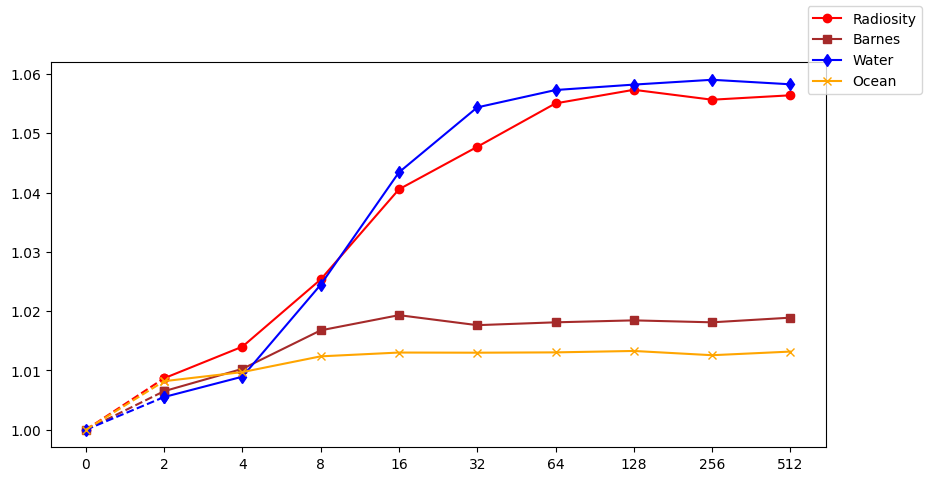

In [197]:
plot_trend("speedup", "Ext", TREND_NO_PREFETCHER_BASELINE+TREND_TABLE_SIZE_2_WAYS)

(<Figure size 1000x500 with 1 Axes>, <Axes: >)

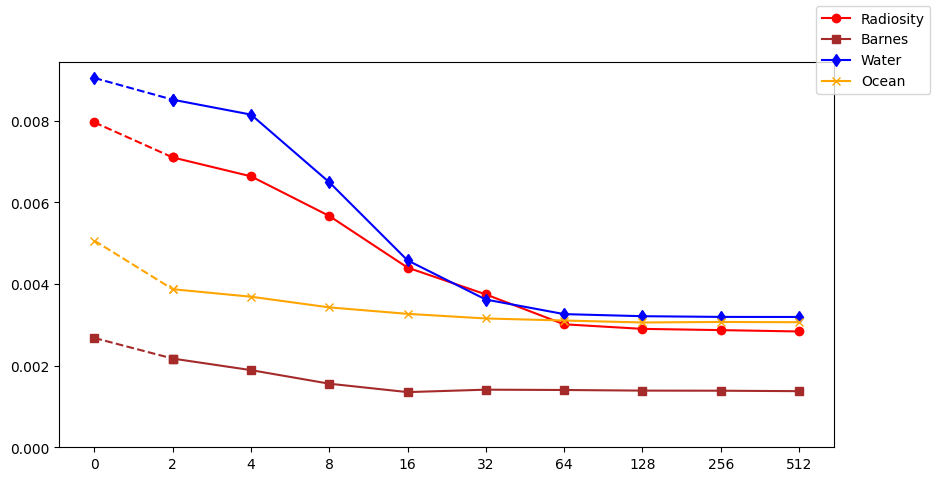

In [198]:
plot_trend("frac_miss", "Ext", TREND_NO_PREFETCHER_BASELINE+TREND_TABLE_SIZE_2_WAYS, ymin=0)


(<Figure size 1000x500 with 1 Axes>, <Axes: >)

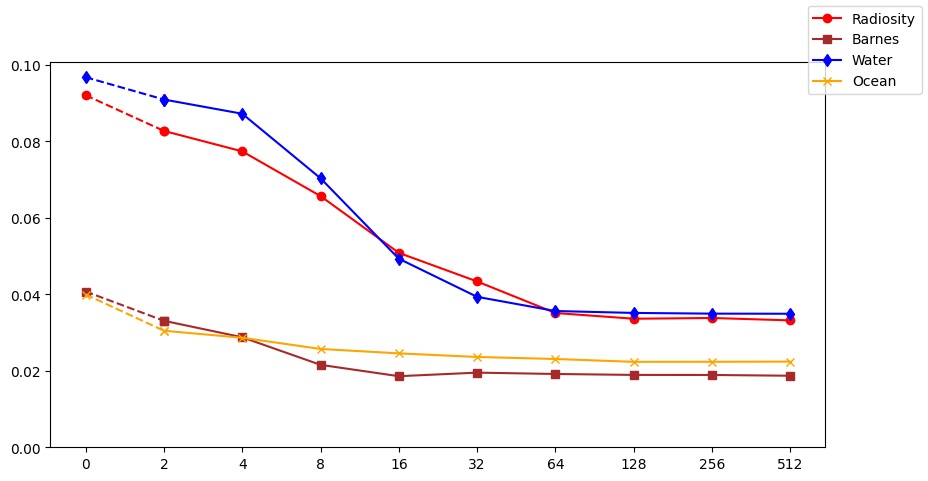

In [199]:
plot_trend("frac_demand_miss_cycles", "Ext", TREND_NO_PREFETCHER_BASELINE+TREND_TABLE_SIZE_2_WAYS, ymin=0)

(<Figure size 1000x500 with 1 Axes>, <Axes: >)

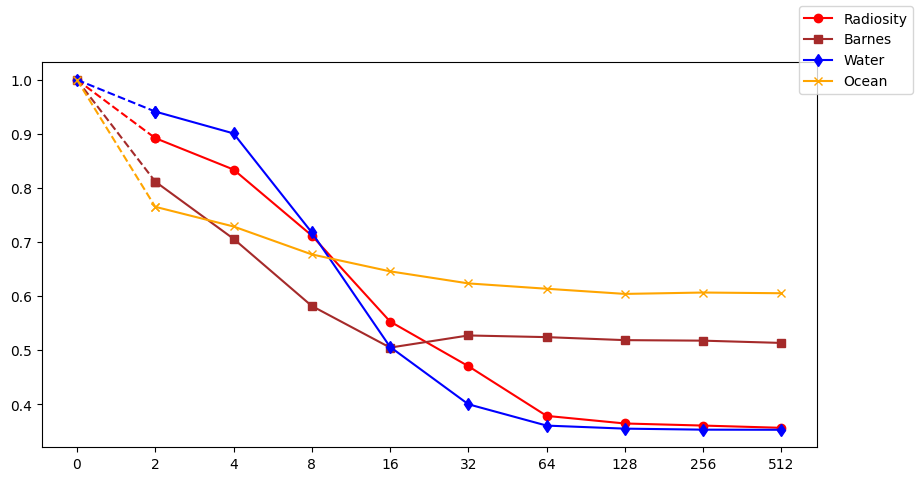

In [200]:
plot_trend("frac_miss_change", "Ext", TREND_NO_PREFETCHER_BASELINE+TREND_TABLE_SIZE_2_WAYS)

(<Figure size 1000x500 with 1 Axes>, <Axes: >)

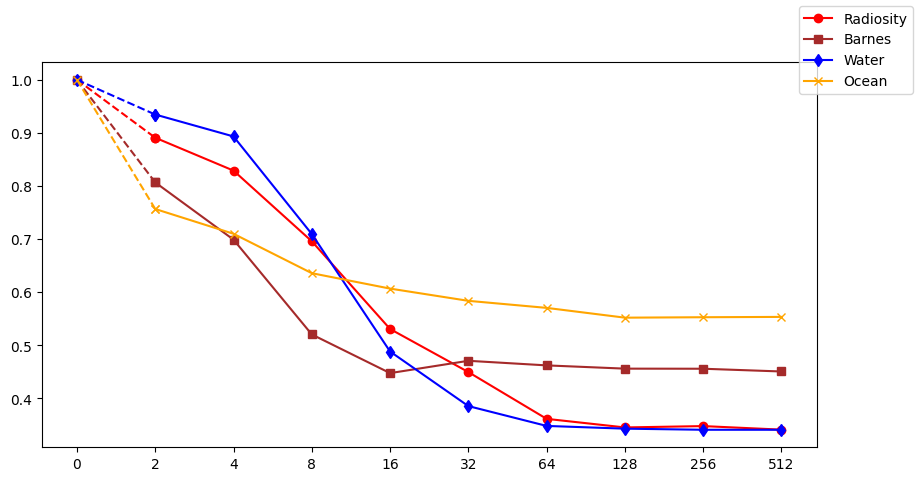

In [201]:
plot_trend("frac_demand_miss_cycles_change", "Ext", TREND_NO_PREFETCHER_BASELINE+TREND_TABLE_SIZE_2_WAYS)

(<Figure size 1000x500 with 1 Axes>, <Axes: >)

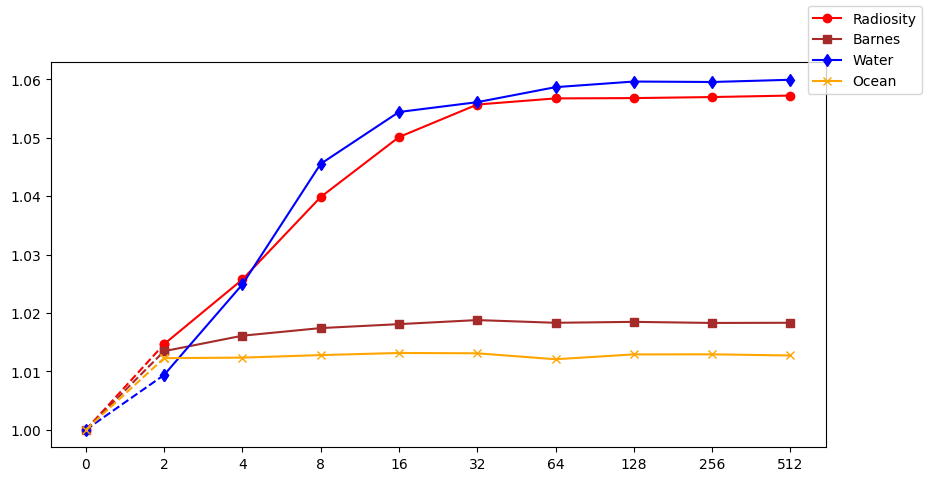

In [202]:
plot_trend("speedup", "Ext", TREND_NO_PREFETCHER_BASELINE+TREND_TABLE_SIZE_4_WAYS)

(<Figure size 1000x500 with 1 Axes>, <Axes: >)

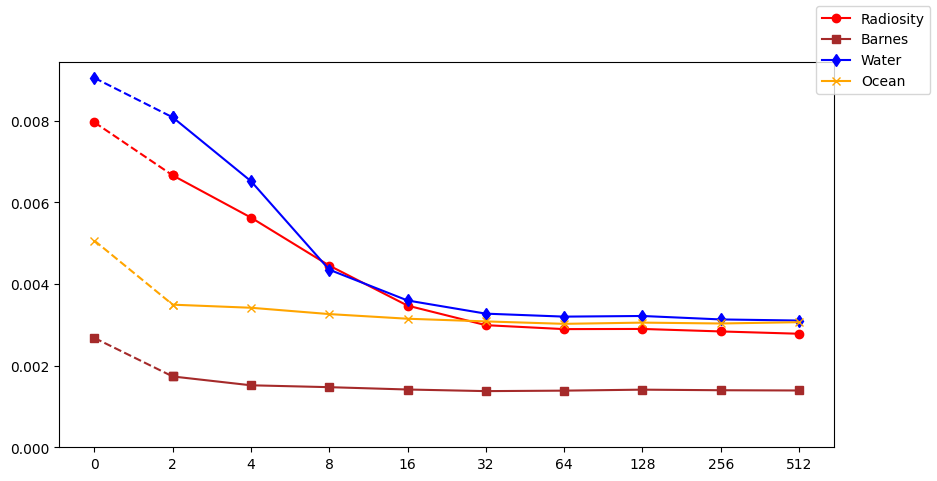

In [203]:
plot_trend("frac_miss", "Ext", TREND_NO_PREFETCHER_BASELINE+TREND_TABLE_SIZE_4_WAYS, ymin=0)


(<Figure size 1000x500 with 1 Axes>, <Axes: >)

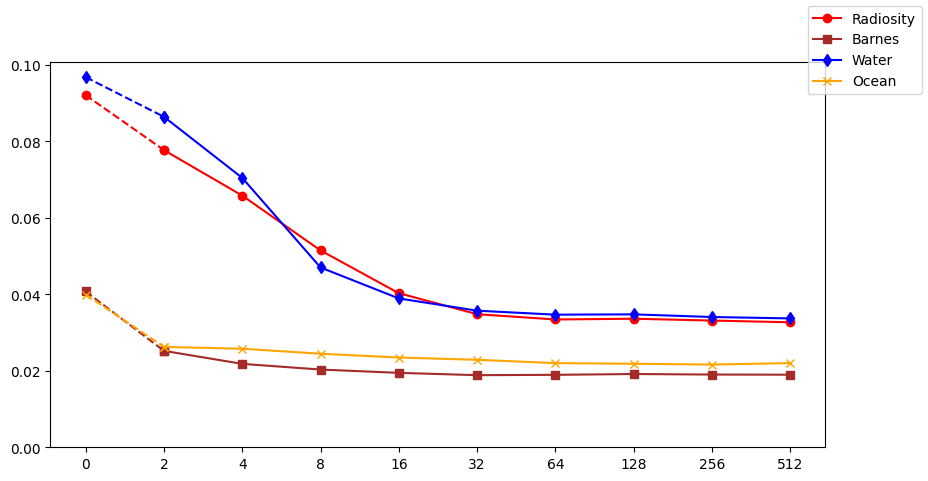

In [204]:
plot_trend("frac_demand_miss_cycles", "Ext", TREND_NO_PREFETCHER_BASELINE+TREND_TABLE_SIZE_4_WAYS, ymin=0)

(<Figure size 1000x500 with 1 Axes>, <Axes: >)

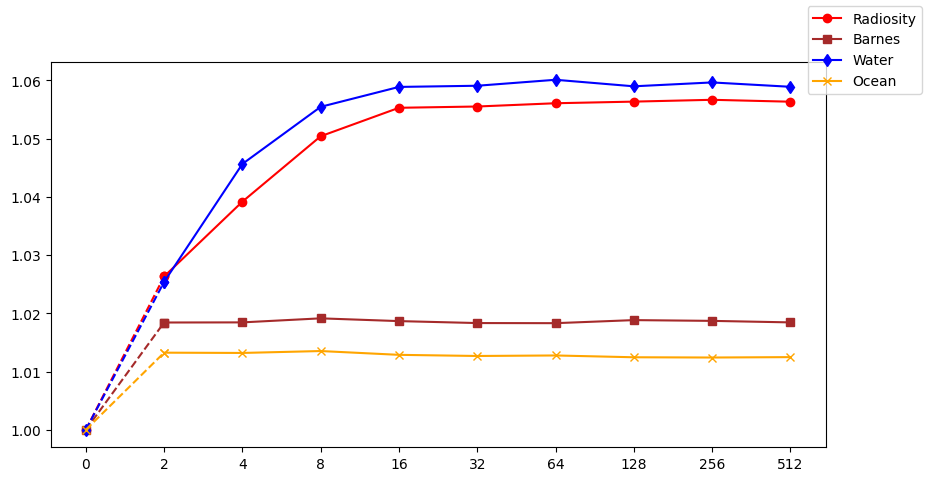

In [205]:
plot_trend("speedup", "Ext", TREND_NO_PREFETCHER_BASELINE+TREND_TABLE_SIZE_8_WAYS)

(<Figure size 1000x500 with 1 Axes>, <Axes: >)

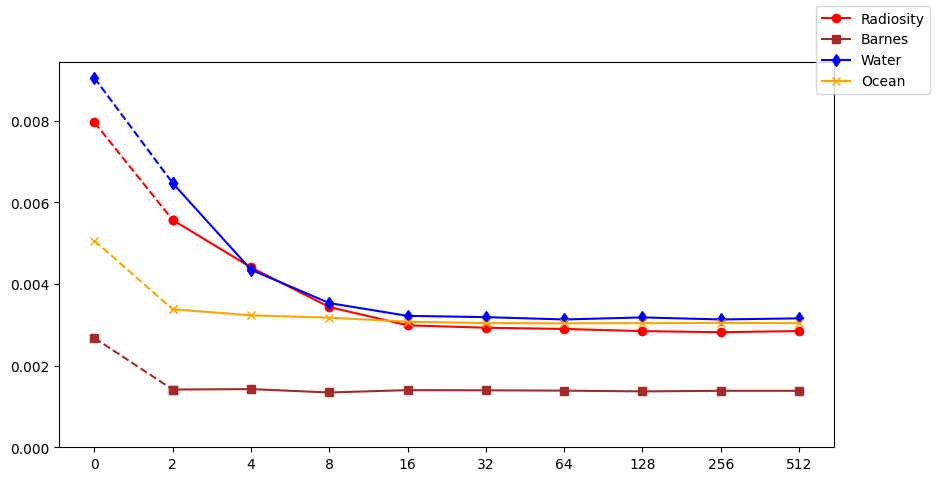

In [206]:
plot_trend("frac_miss", "Ext", TREND_NO_PREFETCHER_BASELINE+TREND_TABLE_SIZE_8_WAYS, ymin=0)


(<Figure size 1000x500 with 1 Axes>, <Axes: >)

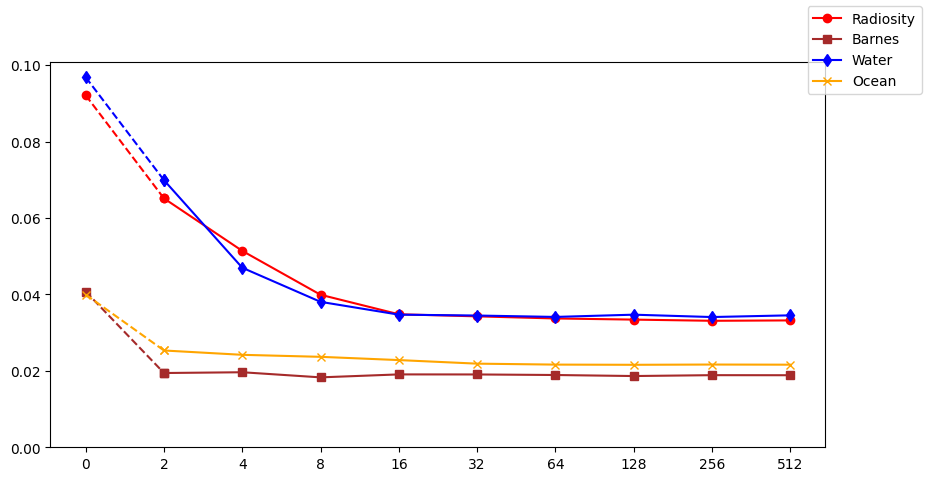

In [207]:
plot_trend("frac_demand_miss_cycles", "Ext", TREND_NO_PREFETCHER_BASELINE+TREND_TABLE_SIZE_8_WAYS, ymin=0)

(<Figure size 1000x500 with 1 Axes>, <Axes: >)

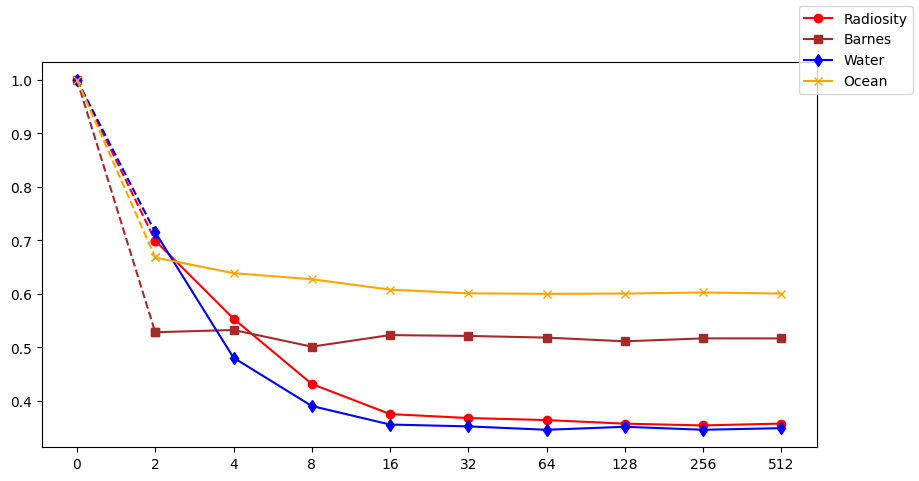

In [208]:
plot_trend("frac_miss_change", "Ext", TREND_NO_PREFETCHER_BASELINE+TREND_TABLE_SIZE_8_WAYS)

(<Figure size 1000x500 with 1 Axes>, <Axes: >)

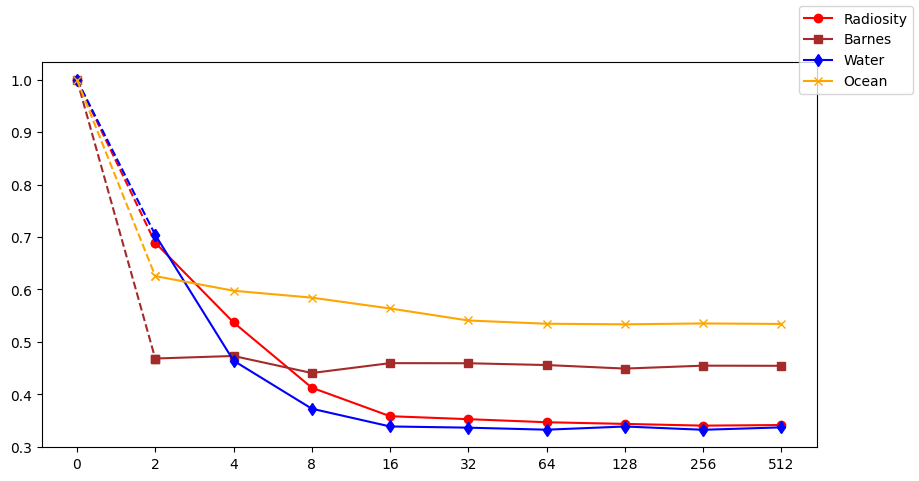

In [209]:
plot_trend("frac_demand_miss_cycles_change", "Ext", TREND_NO_PREFETCHER_BASELINE+TREND_TABLE_SIZE_8_WAYS)

(<Figure size 1000x500 with 1 Axes>, <Axes: >)

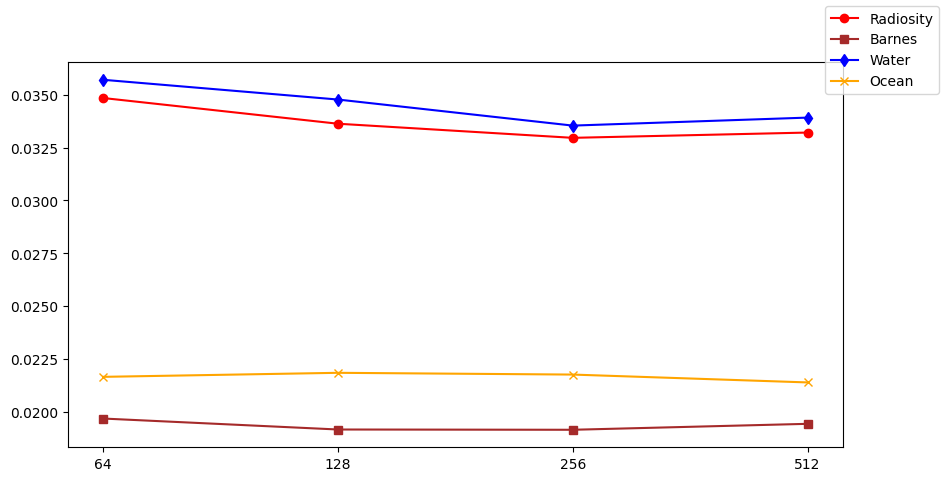

In [210]:
plot_trend("frac_demand_miss_cycles", "Ext", TREND_CACHE_SIZE_4_WAYS_WITH_PREFETCHER)

(<Figure size 1000x500 with 1 Axes>, <Axes: >)

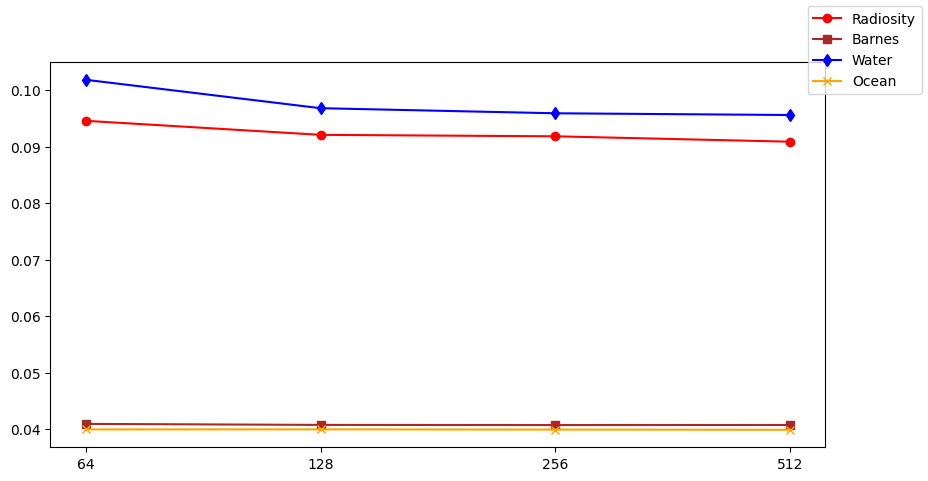

In [211]:
plot_trend("frac_demand_miss_cycles", "Ext", TREND_CACHE_SIZE_4_WAYS_NO_PREFETCHER)

(<Figure size 1000x500 with 1 Axes>, <Axes: >)

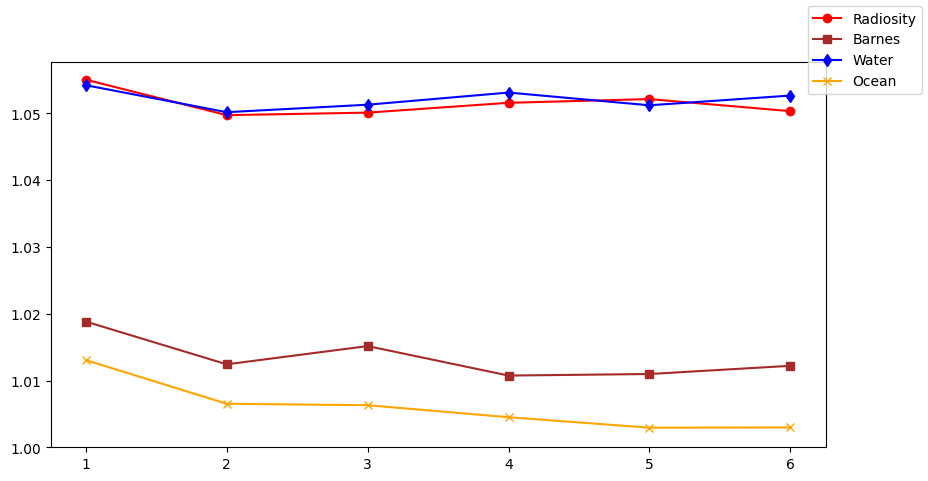

In [212]:
plot_trend("speedup", "Ext", TREND_MAX_ENTANGLINGS_UNCOMPRESSED, ymin=1)

(<Figure size 1000x500 with 1 Axes>, <Axes: >)

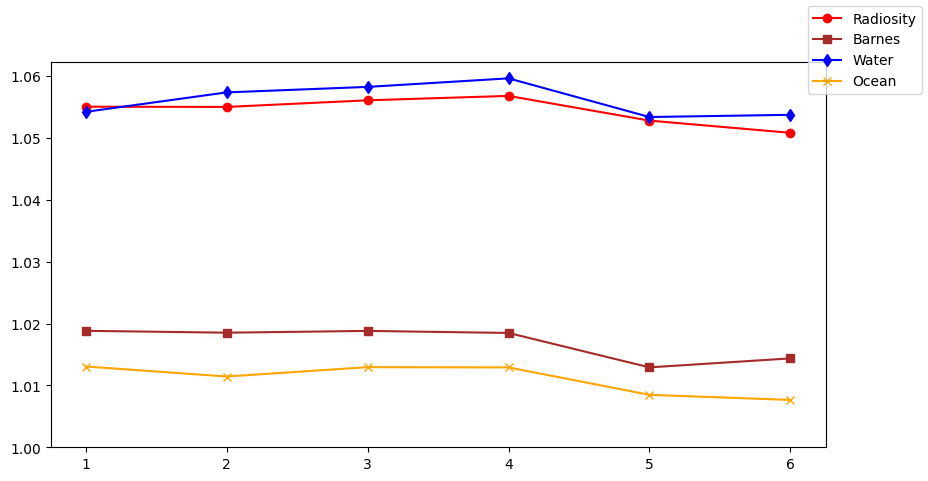

In [213]:
plot_trend("speedup", "Ext", TREND_MAX_ENTANGLINGS_COMPRESSED, ymin=1)

(<Figure size 1000x500 with 1 Axes>, <Axes: >)

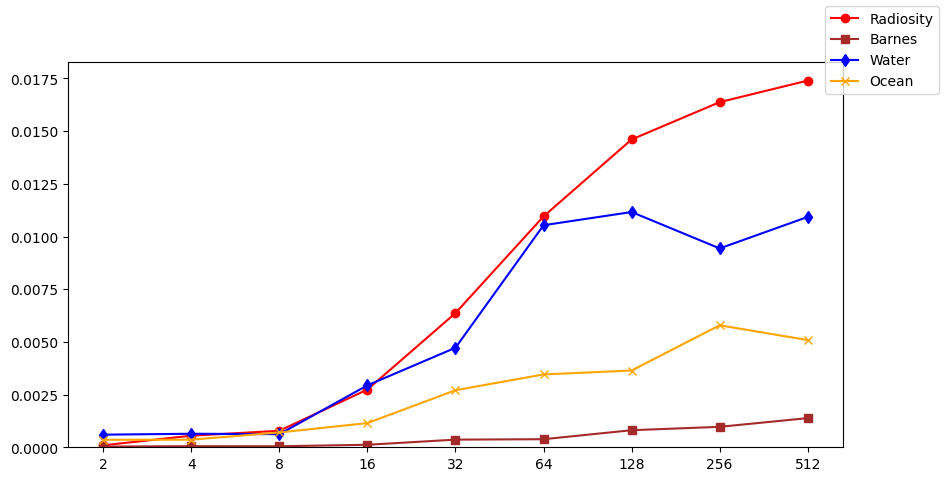

In [217]:
plot_trend("frac_erroneous_prefetch", "Ext", TREND_TABLE_SIZE_2_WAYS, ymin=0)

(<Figure size 1000x500 with 1 Axes>, <Axes: >)

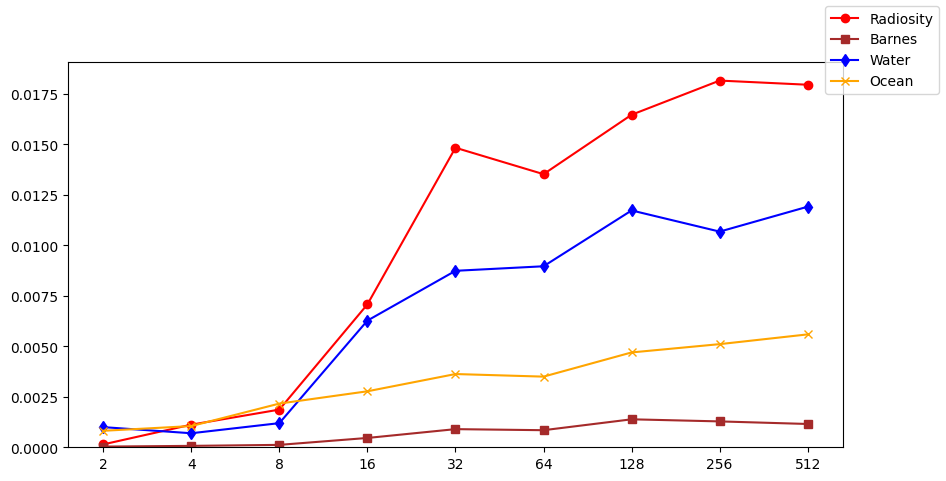

In [218]:
plot_trend("frac_erroneous_prefetch", "Ext", TREND_TABLE_SIZE_4_WAYS, ymin=0)

(<Figure size 1000x500 with 1 Axes>, <Axes: >)

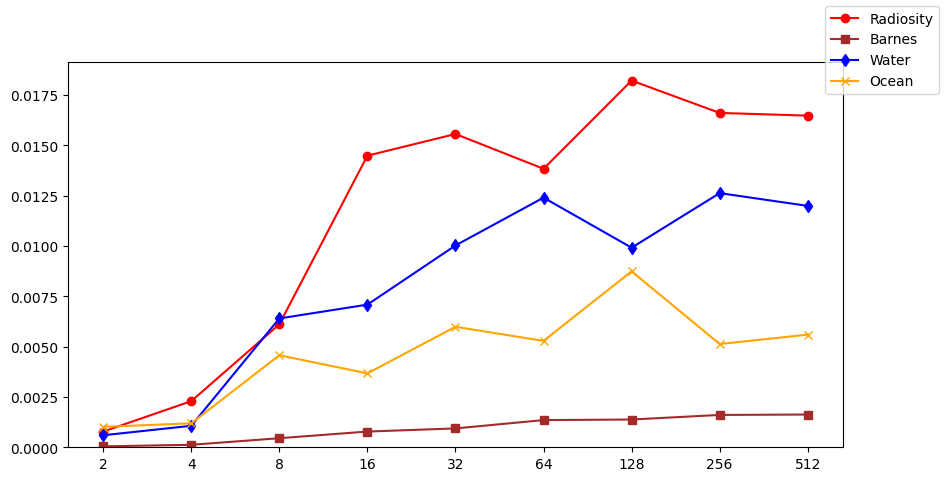

In [219]:
plot_trend("frac_erroneous_prefetch", "Ext", TREND_TABLE_SIZE_8_WAYS, ymin=0)

import os
for config in CONFIGS:
    for benchmark in BENCHMARKS:
        try:
            with open(f"/local/scratch/ldh35/rocket-chip/evaluation/results/20240405-08:11:48/{config}/{benchmark}.output", "r") as fp:
                output = fp.read()
                matches = re.search(OUTPUT_PATTERN, output, re.MULTILINE)
                if matches is None:
                    os.remove(f"/local/scratch/ldh35/rocket-chip/evaluation/results/20240405-08:11:48/{config}/{benchmark}.output")
        except:
            pass